In [50]:
import pandas as pd

In [51]:
dataset=pd.read_csv("insurance_pre.csv")

In [52]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [53]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [54]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [55]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [56]:
independent=dataset[['age','bmi','children','sex_male','smoker_yes']]

In [57]:
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0
...,...,...,...,...,...
1333,50,30.970,3,1,0
1334,18,31.920,0,0,0
1335,18,36.850,0,0,0
1336,21,25.800,0,0,0


In [58]:
dependent=dataset[['charges']]

In [59]:
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [62]:
x_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,0,0
196,39,32.800,0,0,0
438,52,46.750,5,0,0
183,44,26.410,0,0,0
1298,33,27.455,2,1,0
...,...,...,...,...,...
763,27,26.030,0,1,0
835,42,35.970,2,1,0
1216,40,25.080,0,1,0
559,19,35.530,0,1,0


In [29]:
!pip install xgboost

In [63]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [65]:
x_train

array([[-1.5330973 , -0.40713453, -0.89833872, -0.97676557, -0.50466988],
       [-0.03364163,  0.32855417, -0.89833872, -0.97676557, -0.50466988],
       [ 0.89459283,  2.56690911,  3.25603402, -0.97676557, -0.50466988],
       ...,
       [ 0.03776102, -0.91016269, -0.89833872,  1.02378711, -0.50466988],
       [-1.46169465,  0.76659782, -0.89833872,  1.02378711, -0.50466988],
       [-0.46205754, -1.96596021, -0.06746417, -0.97676557, -0.50466988]])

In [41]:
xgbregressor = xgb.XGBRegressor(verbosity=0) 
xgbregressor


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:squarederror',
             predictor=None, random_state=None, reg_alpha=None, ...)

In [66]:
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, ...)

In [69]:
y_pred=xgbr.predict(x_test)

In [70]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [71]:
r_score

0.8264729761172949

In [93]:
r_score = cross_val_score(xgbr, x_train, y_train,cv=10)
print("Mean cross-validation score:", mean_cross_val_score)
mean_cross_val_score = 0.87

Mean cross-validation score: 0.82


In [105]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, x_train, y_train, cv=kfold )
print("K-fold CV average score:", mean_cross_val_score)
mean_cross_val_score = 0.87

K-fold CV average score: 0.87


In [108]:
y_pred = xgbr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)
MSE: 3.35
print("RMSE: %.2f" % (mse**(1/2.0)))
RMSE: 1.83 

MSE: 27672261.68
RMSE: 5260.44


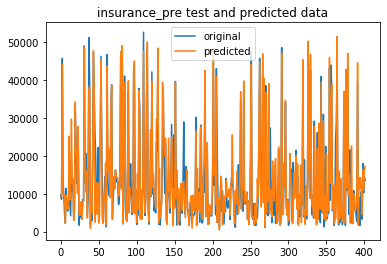

In [111]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("insurance_pre test and predicted data")
plt.legend()
plt.show()

In [112]:
#Save model create file in deployment using import pickle called the file saved in .sav
import pickle
filename="finalized_model_insurance-XGboost.sav"

In [114]:
#Its a dummy data file and the file is write binary dataset in regressor open the file variable
pickle.dump(xgbr,open(filename,'wb'))

In [115]:
#once loaded and check the model
loaded_model=pickle.load(open("finalized_model_insurance-XGboost.sav",'rb'))

In [116]:
result=loaded_model.predict([[16723.5,17823.5,1555,0,1]])

In [117]:
result

array([57368.555], dtype=float32)